# Featurization and Model Tuning_project

## Introduction

**DOMAIN**: Semiconductor manufacturing process

**CONTEXT**: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identified

**DATA DESCRIPTION**: The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing.

Target column “ -1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle

%matplotlib inline

## Load the dataset

In [2]:
# Read data as dataframe and display the shape
data_df = pd.read_csv('signal-data.csv')
print('Shape of Signal data: ', data_df.shape)

Shape of Signal data:  (1567, 592)


In [3]:
data_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


1.   There are 590 features having quite varied values as we see the mean ranging from close to 0 to 3000+
2.   The count of some of the features is less than the total number of rows which is 1567, thus showing the presence of a few null values in those features.
3. The standard deviation of some features like '5' is 0, implying a constant value for the feature.
4. Pass/Fail(target) has -1 and 1 as the values. Since 25%, 50% and 75% all have the value as -1, it implies that the target variable is imbalanced with -1 being the predominant value


## Data Preparation

Remove all the features with 20%+ Null values and impute rest with mean of the feature

In [5]:
for i in data_df.columns:
  if i != 'Time' and i != 'Pass/Fail':
    if data_df[i].isnull().sum()/data_df.shape[0] > 0.2:
      data_df.drop(i, axis=1, inplace=True)
    else:
      data_df[i] = data_df[i].fillna(data_df[i].mean())

In [6]:
data_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


Drop features which have same value for all the rows

In [7]:
# identify features where there is only one distinct value

for i in data_df.columns:
  if i != 'Time' and i != 'Pass/Fail':
    if data_df[i].nunique() == 1:
      data_df.drop(i, axis=1, inplace=True)


In [8]:
data_df.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


Drop 'Time' column since it tracks only the timestamp of the signal and does not contain information for our model

In [9]:
data_df.drop('Time', axis=1, inplace=True)

In [10]:
data_df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 443, dtype: int64

Check for multi-collinearity in the data

In [11]:
# Determine Variance Inflation Factor

vif = pd.DataFrame()
vif["variables"] = data_df.columns
vif["VIF"] = [variance_inflation_factor(data_df.values, i) for i in range(data_df.shape[1])]
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,0,24224.261955
1,1,9573.505757
2,2,154511.611950
3,3,127.670372
4,4,42515.862131
...,...,...
438,586,9.795320
439,587,131.328484
440,588,125.402951
441,589,5.847050


Since columns having VIF > 10 are highly correlated, we can drop them

In [12]:
(vif['VIF'] > 10).sum()

403

In [13]:
# drop features having vif > 10 since that would imply high correlation with other features
for i in vif[vif['VIF'] > 10]['variables']:
  data_df.drop(i, axis=1, inplace = True)


In [14]:
data_df.head()

,9,10,24,41,59,75,76,77,78,79,...,487,488,489,499,500,511,521,586,589,Pass/Fail
0,0.0162,-0.0034,751.00,4.515,-1.7264,0.0126,-0.0206,0.0141,-0.0307,-0.0083,...,0.0000,53.1098,0.0000,0.0000,0.0000,0.0000,0.0,0.021458,99.670066,-1
1,-0.0005,-0.0148,-1640.25,2.773,0.8073,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,...,820.7900,194.4371,0.0000,0.0000,0.0000,0.0000,0.0,0.009600,208.204500,-1
2,0.0041,0.0013,-1916.50,5.434,23.8245,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,...,74.0741,191.7582,250.1742,0.0000,0.0000,244.2748,0.0,0.058400,82.860200,1
3,-0.0124,-0.0033,-1657.25,1.279,24.3791,-0.0555,-0.0461,-0.0400,0.0400,0.0676,...,71.7583,0.0000,336.7660,0.0000,711.6418,0.0000,0.0,0.020200,73.843200,-1
4,-0.0031,-0.0072,117.00,2.209,-12.2945,-0.0534,0.0183,-0.0167,-0.0449,0.0034,...,587.3773,748.1781,0.0000,293.1396,0.0000,0.0000,0.0,0.020200,73.843200,-1


In [15]:
data_df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [16]:
# Label encode the target class
data_df['Pass/Fail'] = data_df['Pass/Fail'].replace([-1,1],[0,1])

In [17]:
data_df['Pass/Fail'].value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

## Data Analysis

Univariate Analysis

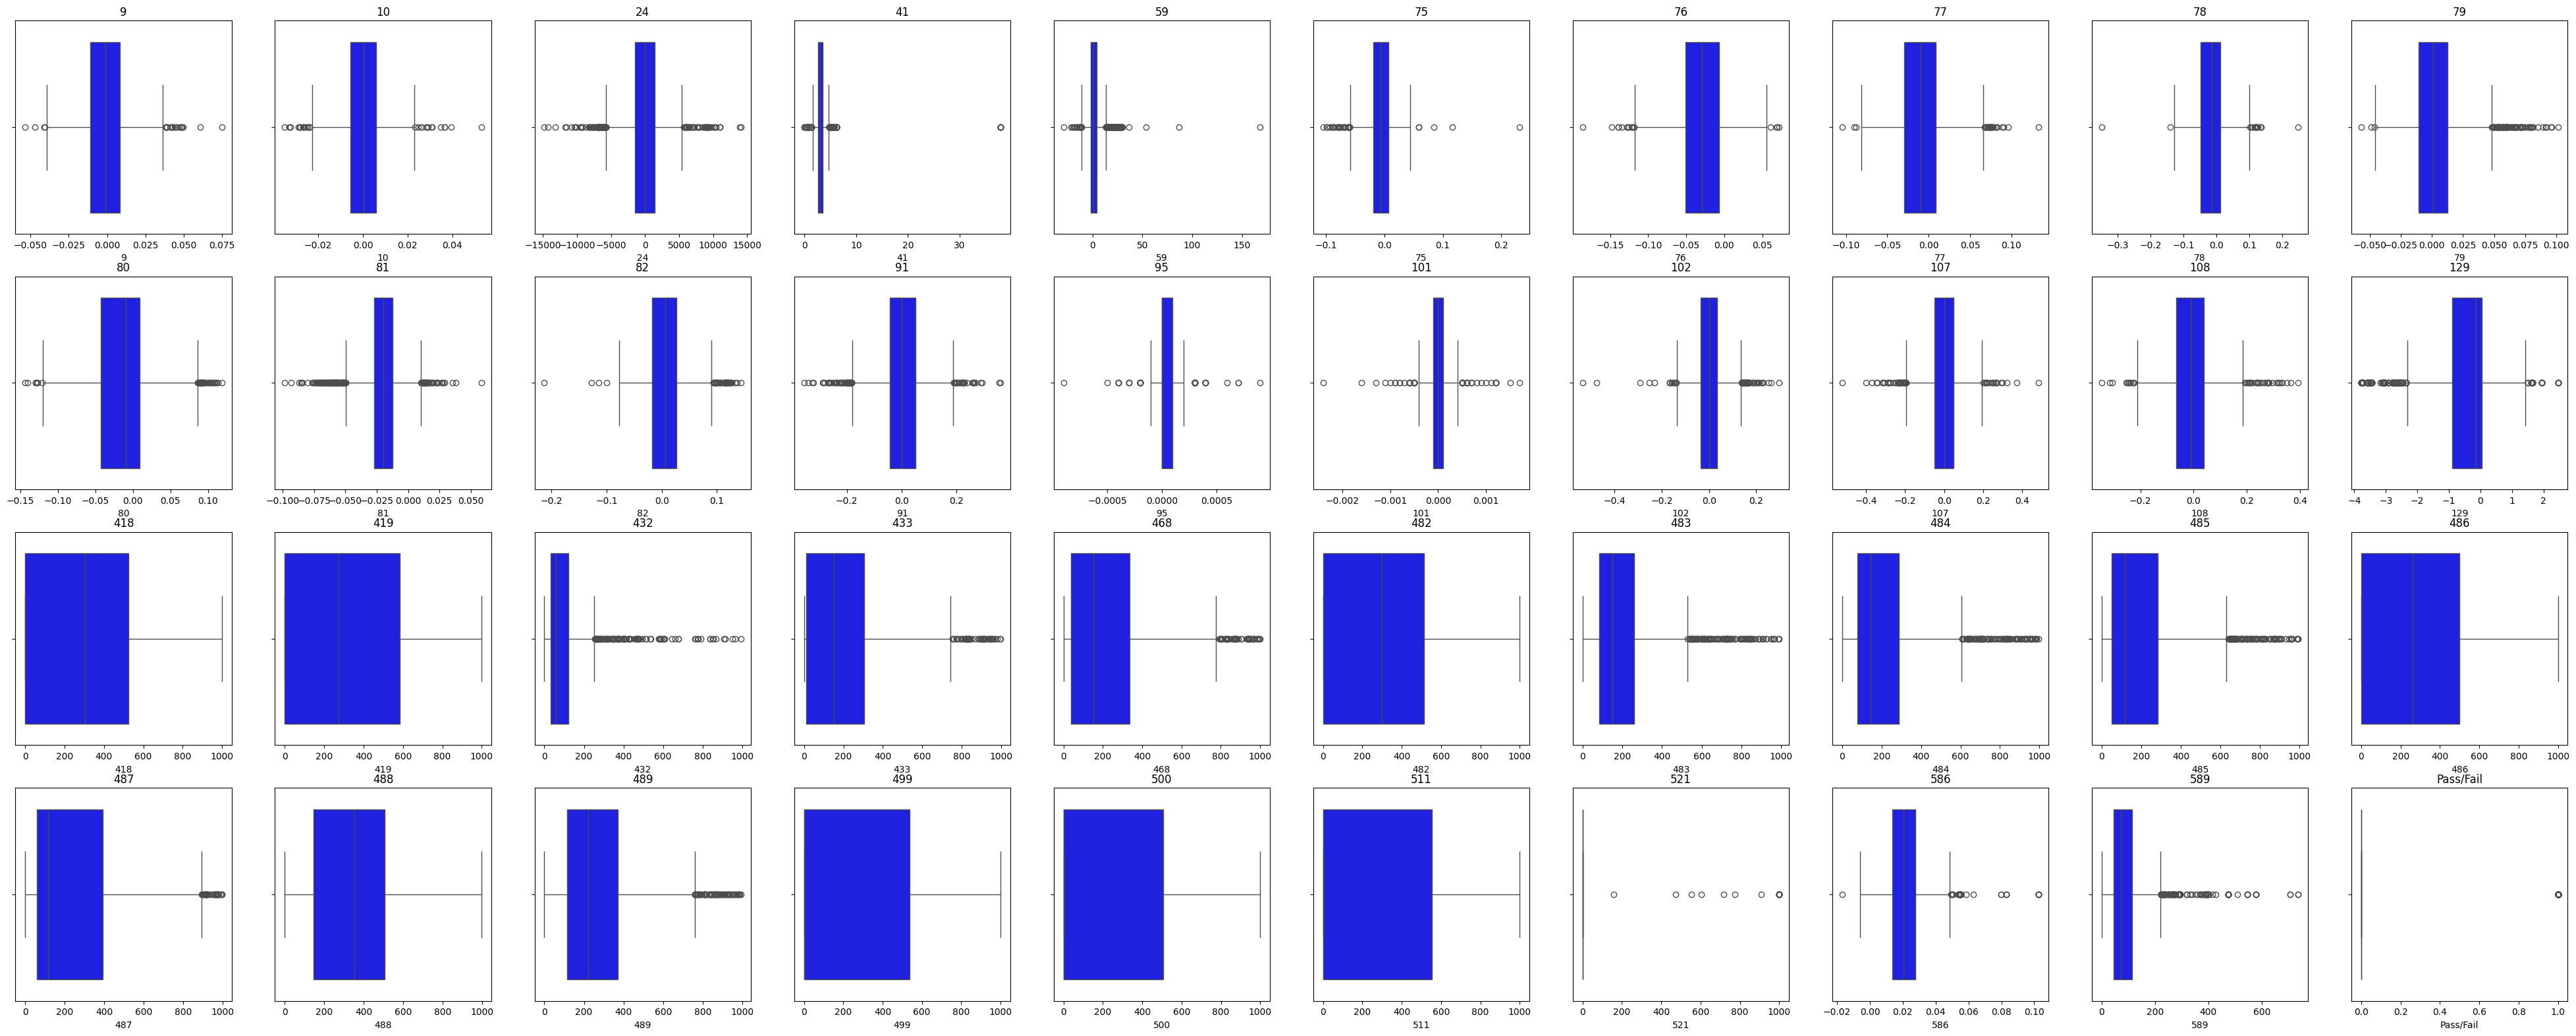

In [18]:
plt.figure(figsize=(50, 100))
col = 1
for i in data_df.columns:
    plt.subplot(20,10, col)
    plt.title(i)
    sns.boxplot(x = data_df[i],color='blue')
    col += 1

1. Among the features which remain, features greater than 400 are left skewed like 418, 419, 432, 433, 468, 482, 483, 484, 485, 486, 487, 488, 489, 499, 500, 511, 521, 586, 589
2. Among the features that remain, there does not seem to be much of a right skew

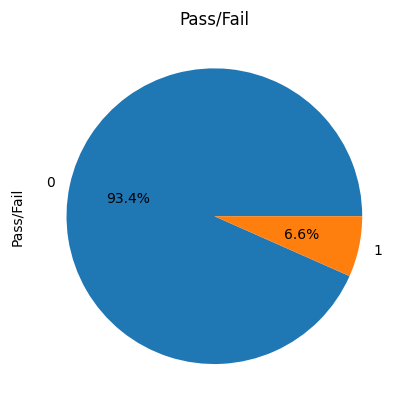

In [19]:
data_df['Pass/Fail'].value_counts().plot.pie(autopct='%1.1f%%');
plt.title('Pass/Fail')
plt.show()

Pass/Fail is imbalanced with 0(-1) being the dominant class

Bivariate and Multivariate Analysis

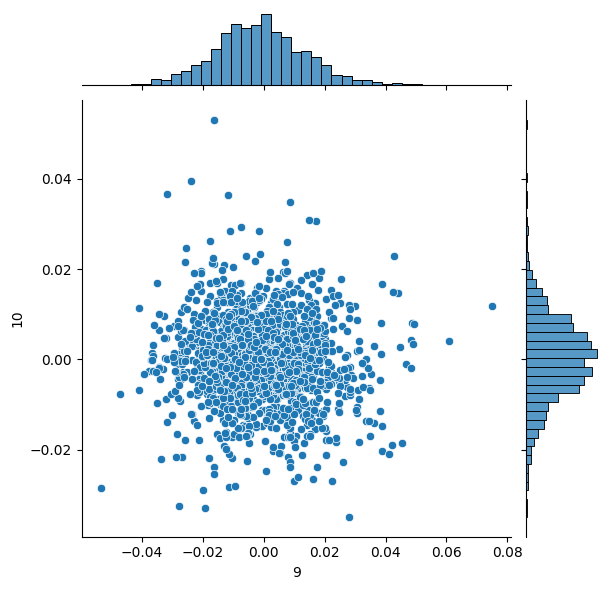

In [20]:
sns.jointplot(data=data_df, x='9', y='10');

Features 9 and 10 seem to be centred around 0 and there does not seem to be much of a correlation between the two features. This is evident since we have removed the highly correlated features

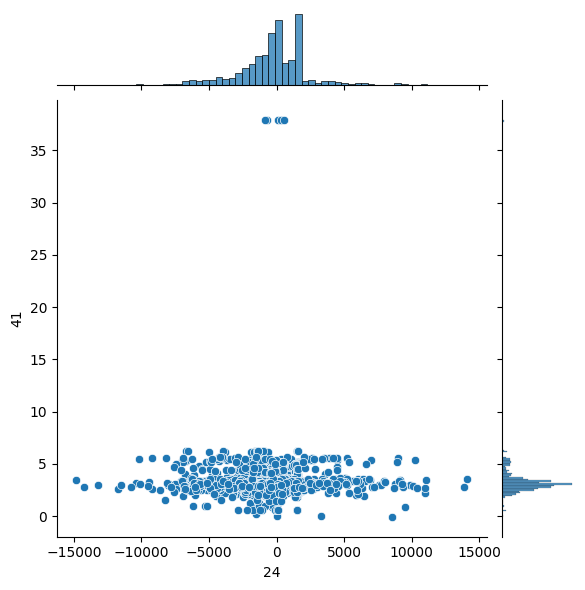

In [21]:
sns.jointplot(data=data_df, x='24', y='41');

Feature 24 has a wide range of values between -15000 to 15000, while 41 has values restricted between 0 and 5 (approx). There does not seem to be a correlation between the two features.

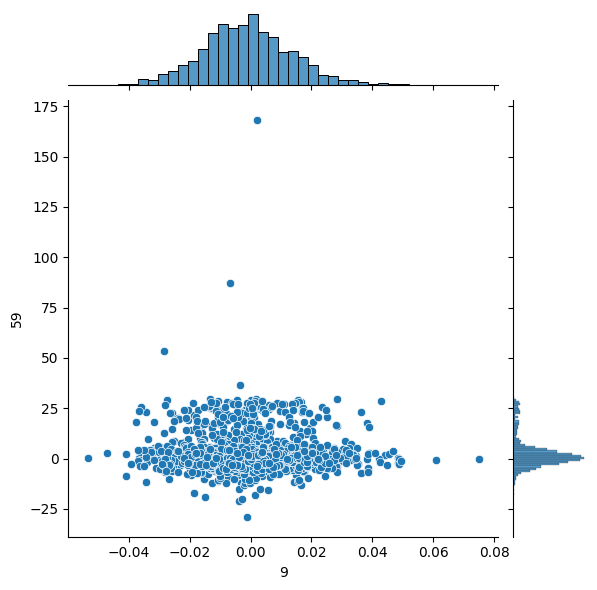

In [22]:
sns.jointplot(data=data_df, x='9', y='59');

Feature 59 seems to have values ranging between -25 to 25 and has a few outliers which have values over 50. Feature 9 is mostly centred around 0 with values between -0.05 and 0.05 with a few outliers greater than 0.05. There does not seem to be a correlation between the two features.

In [23]:
plt.rcParams['figure.figsize'] = (150, 150)
sns.heatmap(data_df.corr(), annot=True);
plt.title('Correlation heatmap for the Data', fontsize = 20)

Text(0.5, 1.0, 'Correlation heatmap for the Data')

As seen in the correlation heatmap, since we have removed the features which are highly correlated, the remaining features do not showcase a high correlation with each other.

## Model Training

Segregate predictors vs target attributes

In [24]:
X = data_df.drop('Pass/Fail', axis=1)
y = data_df['Pass/Fail']

Check for target balancing and fix it if found imbalanced

In [25]:
y.value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

In order to balance the data, we can use SMOTE - Synthetic Minority Oversampling Technique to increase the number of rows having target value as 1

In [26]:
smote = SMOTE(random_state=42)
x_s,y_s = smote.fit_resample(X,y)

In [27]:
y_s.value_counts()

0    1463
1    1463
Name: Pass/Fail, dtype: int64

Perform train-test split and standardise the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size = 0.25, random_state = 42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [31]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
9,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.001300,0.00840,0.0749
10,1567.0,0.000146,0.009296,-0.0349,-0.00560,0.000400,0.00590,0.0530
24,1567.0,-298.598136,2900.835956,-14804.5000,-1474.37500,-80.500000,1376.25000,14106.0000
41,1567.0,3.353066,2.342268,-0.0759,2.69900,3.080000,3.51500,37.8800
59,1567.0,2.960241,9.510891,-28.9882,-1.85545,0.973600,4.33770,168.1455
75,1567.0,-0.006903,0.022121,-0.1049,-0.01920,-0.006600,0.00660,0.2315
76,1567.0,-0.029390,0.032948,-0.1862,-0.05135,-0.029390,-0.00690,0.0723
77,1567.0,-0.007041,0.031127,-0.1046,-0.02940,-0.009400,0.00890,0.1331
78,1567.0,-0.013643,0.047504,-0.3482,-0.04730,-0.013643,0.01205,0.2492
79,1567.0,0.003458,0.022902,-0.0568,-0.01070,0.000800,0.01280,0.1013


In [32]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2194.0,9.715717e-18,1.000228,-2.876430,-0.638754,-0.028719,0.622417,4.714979
1,2194.0,-3.238572e-18,1.000228,-3.701986,-0.623742,0.067748,0.653417,5.878491
2,2194.0,4.857858e-18,1.000228,-5.653100,-0.425785,0.141213,0.650287,5.683775
3,2194.0,7.124859e-17,1.000228,-1.702447,-0.344520,-0.129483,0.161032,16.932116
4,2194.0,-7.286787e-18,1.000228,-3.757705,-0.689647,-0.277060,0.561846,8.715558
5,2194.0,-1.943143e-17,1.000228,-4.434349,-0.533207,0.005655,0.521201,10.807120
6,2194.0,-3.238572e-18,1.000228,-5.033188,-0.640172,-0.010330,0.616979,3.484487
7,2194.0,-1.781215e-17,1.000228,-3.358393,-0.682289,-0.044118,0.531891,4.859442
8,2194.0,-2.590858e-17,1.000228,-7.521829,-0.774997,-0.053012,0.593086,6.133161
9,2194.0,-5.181715e-17,1.000228,-2.527808,-0.706929,-0.138288,0.548105,3.929651


In [33]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
0,732.0,2.305381e-17,1.000684,-3.720922,-0.603573,-0.012034,0.587265,5.601751
1,732.0,-2.426717e-18,1.000684,-3.785060,-0.605475,0.054235,0.634625,3.298710
2,732.0,-1.456030e-17,1.000684,-5.636724,-0.487496,0.087960,0.646338,5.699564
3,732.0,-4.659297e-16,1.000684,-3.422472,-0.636735,-0.198259,0.439048,3.074091
4,732.0,-4.853434e-18,1.000684,-2.427239,-0.567980,-0.288179,0.454775,14.210875
5,732.0,-9.706868e-18,1.000684,-3.541759,-0.504413,-0.040975,0.469974,8.601563
6,732.0,-1.941374e-17,1.000684,-4.743969,-0.617943,0.040685,0.567708,2.860229
7,732.0,-2.426717e-18,1.000684,-2.456733,-0.710664,-0.074716,0.487400,3.266099
8,732.0,4.368091e-17,1.000684,-2.760352,-0.786436,-0.070797,0.603614,3.535933
9,732.0,-4.853434e-17,1.000684,-2.702202,-0.683053,-0.151479,0.487064,3.990198


Train a KNN model

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Accuracy on Test data:',knn.score(X_test, y_test) )

Accuracy on Test data: 0.7513661202185792


Use cross validation techniques

In [35]:
knn_score_cv = cross_val_score(knn, x_s, y_s, cv = 10).mean()
print('Cross validation score of KNN = ',knn_score_cv)

Cross validation score of KNN =  0.8075973631305813


Apply hyper-parameter tuning techniques to get the best accuracy

In [36]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn_classifier = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypred= knn_classifier.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, ypred)

mean_acc

array([0.83469945, 0.86748634, 0.78278689, 0.81557377, 0.75136612,
       0.7704918 , 0.73497268, 0.75546448, 0.72540984, 0.73497268,
       0.70628415, 0.7226776 , 0.69125683, 0.70218579, 0.67076503,
       0.68442623, 0.66256831, 0.67076503, 0.65710383, 0.67076503])

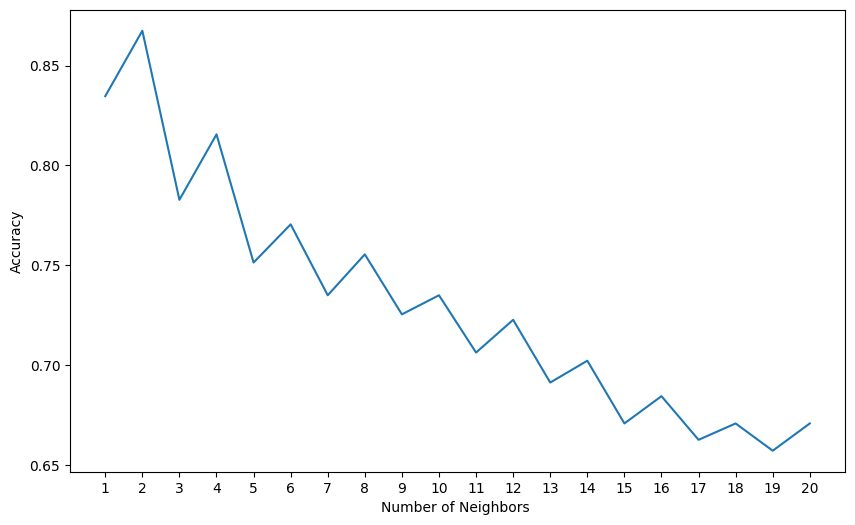

In [37]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [38]:
grid_params = { 'n_neighbors' : [2,3,4,5,6,7],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3)

# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [39]:
g_res.best_score_

0.9188731408181522

In [40]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

In [41]:
knnclassifier = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform',metric = 'manhattan')
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [42]:
# Predict the label in the test dataset
# Calculate the accuracy score
knnpred = knnclassifier.predict(X_test)
knnclassifier.score(X_test, y_test)

0.8920765027322405

In [43]:
knn_score_cv = cross_val_score(knnclassifier, x_s, y_s, cv = 10).mean()
print('Cross validation score of KNN = ',knn_score_cv)

Cross validation score of KNN =  0.9145764177848426


<Axes: >

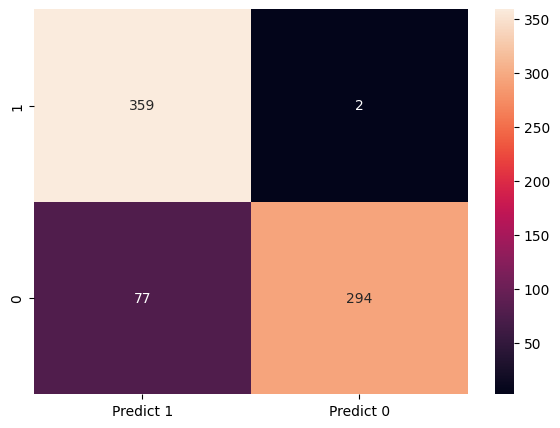

In [44]:
cm=metrics.confusion_matrix(y_test, knnpred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [45]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       371
           1       0.82      0.99      0.90       361

    accuracy                           0.89       732
   macro avg       0.91      0.89      0.89       732
weighted avg       0.91      0.89      0.89       732



Accuracy for KNN on the test data is 89%, however recall for target as 0 has come quite low at 79% since there are quite a number of false negatives - 77

Apply PCA to reduce the number of dimensions and enhance the model performance

In [46]:
# Apply PCA on the data for all features to reduce the number of dimensions
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.000456   -0.06900389 -0.01813661 ...  0.05308815  0.01877509
  -0.03063082]
 [-0.06900389  1.000456   -0.06720877 ...  0.01370573  0.01566875
   0.0089249 ]
 [-0.01813661 -0.06720877  1.000456   ...  0.03868764  0.01381201
  -0.04619312]
 ...
 [ 0.05308815  0.01370573  0.03868764 ...  1.000456   -0.01560465
   0.05198901]
 [ 0.01877509  0.01566875  0.01381201 ... -0.01560465  1.000456
  -0.48638147]
 [-0.03063082  0.0089249  -0.04619312 ...  0.05198901 -0.48638147
   1.000456  ]]
Eigenvectors 
[[-0.14127438  0.10053661  0.02054008 ...  0.26275839 -0.02143455
  -0.01858794]
 [-0.01051563 -0.11959706  0.21614848 ...  0.01192807 -0.17807815
  -0.23956171]
 [ 0.06137063 -0.08448066 -0.18319858 ...  0.08352729 -0.2686473
   0.21741577]
 ...
 [ 0.02453954  0.04008214 -0.01838637 ... -0.10458032  0.05033288
   0.08192991]
 [-0.10408708 -0.23097007 -0.32703404 ... -0.13851825 -0.02068103
   0.04354008]
 [ 0.11238837  0.1798153   0.3380162  ...  0.06246924 -0.0513702


In [47]:
total = sum(e_vals)
var_expl = [( i /total ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_expl = np.cumsum(var_expl)
print("Cumulative Variance Explained", cum_var_expl)

Cumulative Variance Explained [  7.68865462  13.03322521  17.63043969  21.8407458   25.77081366
  29.61877842  33.22856264  36.65395065  39.87541105  43.01004797
  46.10270959  49.04733018  51.8846882   54.59454712  57.26408321
  59.8604804   62.40071323  64.84945441  67.24404961  69.60867603
  71.85605386  74.03506082  76.15125481  78.15868135  80.14290468
  82.05815065  83.91308714  85.7252809   87.42347563  89.00308543
  90.53755934  92.03618023  93.49512933  94.87485803  96.15413374
  97.23271994  98.2526825   99.20397765 100.        ]


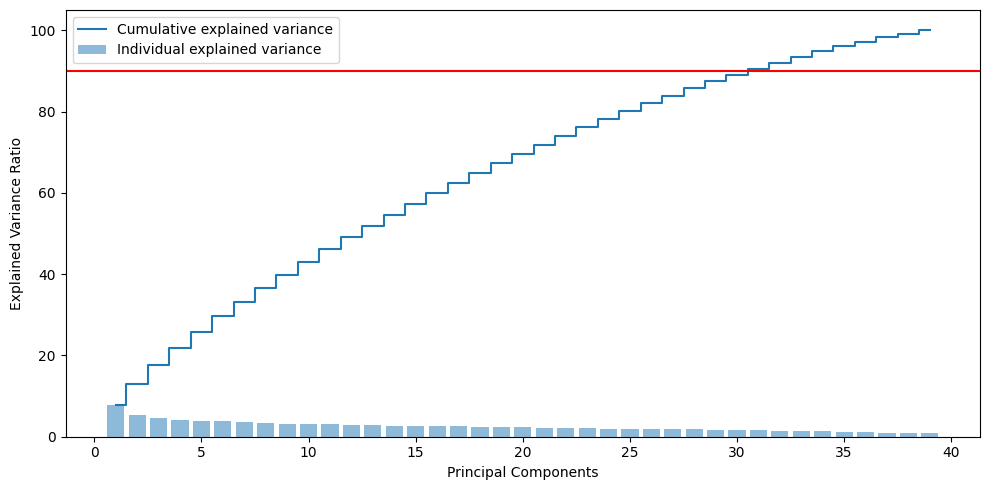

In [48]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_expl, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_expl, where='mid', label = 'Cumulative explained variance')
plt.axhline(y=90, color='r', linestyle='-')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Based on the graph above, 31 components explain slightly more than 90% of the variance. Based on the graph above, it is clear that each feature explains a small component of the target variable.

In [49]:
# Reducing the dimensions to 31
pca = PCA(n_components = 31, random_state = 42)
pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)


(2194, 31)
(732, 31)


In [50]:
pca.components_

array([[ 0.1567669 ,  0.03336348, -0.10187707, ..., -0.05417072,
         0.07617755, -0.05294767],
       [ 0.22731931, -0.24223922,  0.00473948, ...,  0.07316666,
        -0.38040462,  0.35317179],
       [ 0.13167669,  0.0632126 , -0.03141146, ...,  0.19878808,
         0.12239964, -0.01560615],
       ...,
       [ 0.23109053,  0.08639435, -0.15932048, ...,  0.00726247,
        -0.01324784,  0.17347248],
       [-0.13749318, -0.03150275,  0.05069082, ...,  0.14738804,
         0.03261555,  0.06200001],
       [ 0.05444765,  0.3933958 ,  0.09013071, ..., -0.092978  ,
        -0.01446751,  0.00706532]])

In [51]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(30)
for i in range(1,31):
    #Train Model and Predict
    knn_classifier = KNeighborsClassifier(n_neighbors = i).fit(X_train_reduced,y_train)
    ypred= knn_classifier.predict(X_test_reduced)
    mean_acc[i-1] = metrics.accuracy_score(y_test, ypred)

mean_acc

array([0.53415301, 0.53278689, 0.53415301, 0.51092896, 0.52595628,
       0.52322404, 0.54098361, 0.54098361, 0.55464481, 0.54644809,
       0.56284153, 0.56557377, 0.56010929, 0.55327869, 0.56693989,
       0.56284153, 0.55327869, 0.55191257, 0.55464481, 0.56284153,
       0.56284153, 0.56557377, 0.55874317, 0.55874317, 0.54918033,
       0.54098361, 0.54098361, 0.54918033, 0.54098361, 0.54098361])

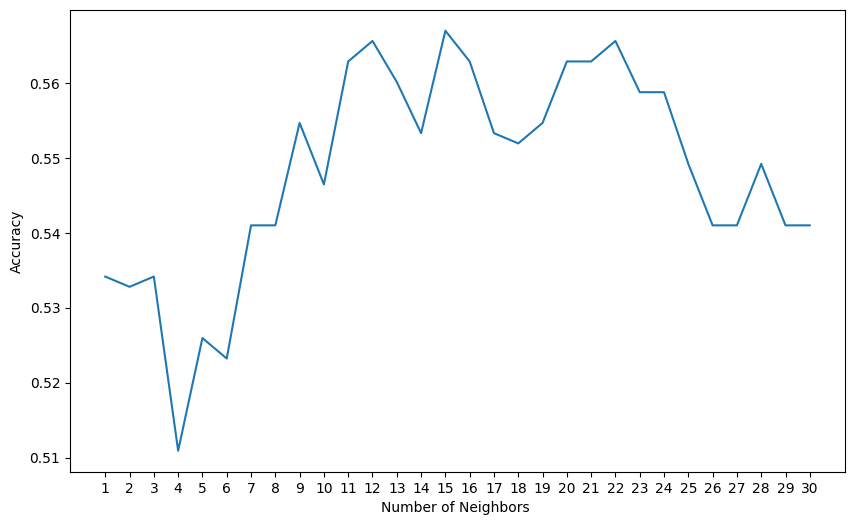

In [52]:
loc = np.arange(1,31,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [53]:
grid_params = { 'n_neighbors' : [11,12,13,15,16,21,22],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3)

# fit the model on our train set
g_res = gs.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [54]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}

In [55]:
knnclassifier_red = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform',metric = 'minkowski')
knnclassifier_red.fit(X_train_reduced, y_train)
knnpredred = knnclassifier_red.predict(X_test_reduced)
print(knnclassifier_red.score(X_test_reduced, y_test))

0.5655737704918032


Classification Report

<Axes: >

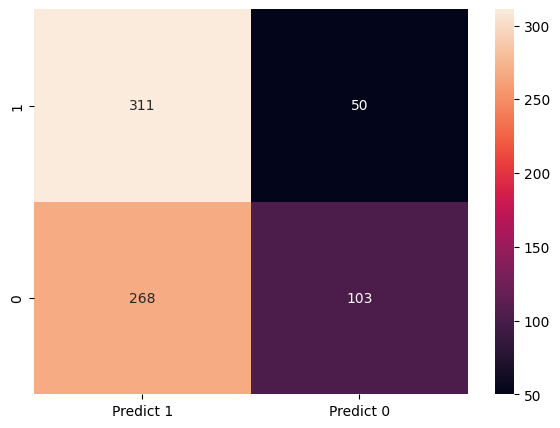

In [56]:
cm=metrics.confusion_matrix(y_test, knnpredred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [57]:
print(classification_report(y_test, knnpredred))

              precision    recall  f1-score   support

           0       0.67      0.28      0.39       371
           1       0.54      0.86      0.66       361

    accuracy                           0.57       732
   macro avg       0.61      0.57      0.53       732
weighted avg       0.61      0.57      0.53       732



After applying PCA and reducing the number of dimensions to 31, it leads to a drastic drop in performance since accuracy comes down to 57%. Recall for target as 0 is also quite poor at 0.28.

Moreover, as we saw in the graph depicting explainability of target variable, each component incrementally explains small portion of the target variable and hence it may **NOT** be prudent to go for dimensionality reduction.

In the forthcoming models, we will proceed with raw data, i.e., without dimensionality reduction.

Train SVM classifier

In [58]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.779 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [60]:
svclassifier = svm.SVC(gamma=0.1, C=10, kernel='rbf')
svclassifier.fit(X_train , y_train)
svc_pred = svclassifier.predict(X_test)
print('SVM accuracy score:',svclassifier.score(X_test, y_test))

SVM accuracy score: 0.9972677595628415


<Axes: >

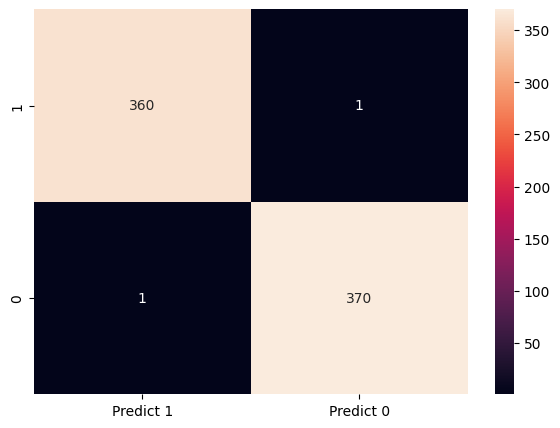

In [61]:
cm=metrics.confusion_matrix(y_test, svc_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [62]:
print("classification  Matrix:\n",classification_report(y_test,svc_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       361

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



SVM classifier with best hyperparameters as determined by tuning them has given very good results with almost 100% across all the parameters. There is only one false negative for both target values 0 and 1

Random Forest

In [63]:
forest_params = {'max_depth': list(range(10, 15)),
                 'max_features': list(range(0,14)),
                  'n_estimators':[10,20,30,40,50]}

grid = GridSearchCV(RandomForestClassifier(), forest_params, cv = 5, refit = True, scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 1750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [64]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'max_depth': 14, 'max_features': 3, 'n_estimators': 30}
RandomForestClassifier(max_depth=14, max_features=3, n_estimators=30)


In [65]:
rfclassifier = RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth = 14, max_features = 1)
rfclassifier.fit(X_train, y_train)
rfcl_pred = rfclassifier.predict(X_test)
print('Random Forest accuracy score:',rfclassifier.score(X_test, y_test))

Random Forest accuracy score: 0.9508196721311475


<Axes: >

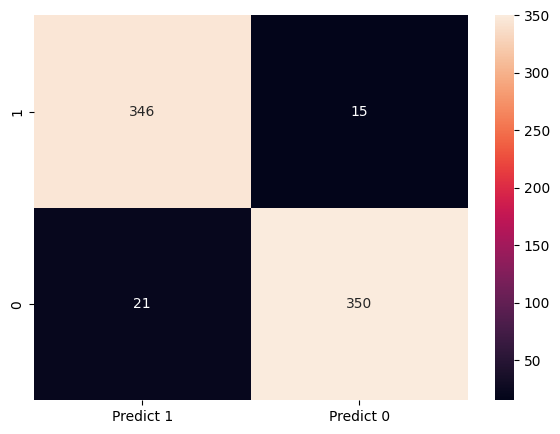

In [66]:
cm=metrics.confusion_matrix(y_test, rfcl_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [67]:
print("classification  Matrix:\n",classification_report(y_test,rfcl_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       371
           1       0.94      0.96      0.95       361

    accuracy                           0.95       732
   macro avg       0.95      0.95      0.95       732
weighted avg       0.95      0.95      0.95       732



Random Forest Classifier with best parameters as determined by tuning the hyperparameters has given good accuracy of 95% while recall and precision are also between  94% and 96%

XGBoost

In [68]:
xgb_params = {'max_depth': list(range(10, 15)),
                 'gamma':[0.1,0.5,1,0.01,0.001],
                  'learning_rate':[0.1,0.5,1,0.01,0.001]}

grid = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv = 5, refit = True, scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.1, 0.5, 1, 0.01, 0.001],
                         'learning_rate': [0.1, 0.5, 1, 0.01, 0.001],
                         'max_depth': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [69]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'gamma': 0.001, 'learning_rate': 0.5, 'max_depth': 10}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [70]:
xgbc = xgb.XGBClassifier(gamma=0.001, learning_rate=0.5, max_depth=14)
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)
print('XGBoost accuracy score',xgbc.score(X_test, y_test))

XGBoost accuracy score 0.8142076502732241


<Axes: >

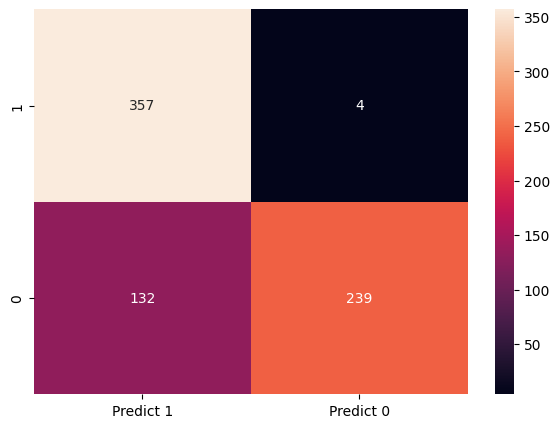

In [71]:
cm=metrics.confusion_matrix(y_test, xgbc_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [72]:
print("classification  Matrix:\n",classification_report(y_test,xgbc_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.98      0.64      0.78       371
           1       0.73      0.99      0.84       361

    accuracy                           0.81       732
   macro avg       0.86      0.82      0.81       732
weighted avg       0.86      0.81      0.81       732



XGBoost Classifier with best parameters as determined by tuning the hyperparameters has given an accuracy of 77% while recall for target value as 0 is 0.55 and precision for target as 1 is 0.69. It is not good as the SVM or Random Forest models

## Model Evaluation

Display and compare all the models designed with their train and test accuracies

In [73]:
print('KNN accuracy scores')
print('Train accuracy: ',knnclassifier.score(X_train, y_train))
print('Test accuracy: ',knnclassifier.score(X_test, y_test))

print('SVC accuracy scores')
print('Train accuracy: ',svclassifier.score(X_train, y_train))
print('Test accuracy: ',svclassifier.score(X_test, y_test))

print('Random Forest accuracy scores')
print('Train accuracy: ',rfclassifier.score(X_train, y_train))
print('Test accuracy: ',rfclassifier.score(X_test, y_test))

print('XGBoost accuracy scores')
print('Train accuracy: ',xgbc.score(X_train, y_train))
print('Test accuracy: ',xgbc.score(X_test, y_test))

KNN accuracy scores
Train accuracy:  0.9995442114858706
Test accuracy:  0.8920765027322405
SVC accuracy scores
Train accuracy:  1.0
Test accuracy:  0.9972677595628415
Random Forest accuracy scores
Train accuracy:  0.9990884229717412
Test accuracy:  0.9508196721311475
XGBoost accuracy scores
Train accuracy:  1.0
Test accuracy:  0.8142076502732241


Select the final best trained model along with your detailed comments for selecting this model

SVM Classifier ({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}) has given almost 100% accuracy with only 2 being misclassified. So there is one false negative for target value 0 and 1. So, SVM classifier is the best model for this dataset.

Pickle the selected model for future use

Mount Google Drive in order to save the best model

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
# Save in Google drive path
path = '/content/drive/MyDrive/Colab Notebooks/PGP AIML'
pickle.dump(svclassifier,open(path+'model.pkl', 'wb'))